In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataCollection import *

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
OC = 'Ruprecht_147'

In [8]:
#step0: match apogee data with gaia data
#apogee_Teff = matchApogeeGaia('k2')

#step 1: get members in gaia IDs and write a simbad input file
gaia_IDs, member_df = genSimbad(OC, "{}/{}_simbad_input.txt".format(OC,OC))

#step 2: astroquery for gaia Gband mags, luminosities and distances, then tm_IDs
gaia_df = GAIA_query(gaia_IDs)
gaia_df = GAIA_query_tm(gaia_df, gaia_IDs)

#step 3: merging apogee_gaia df with gaia_df
step3_df = matchApogeeToData(gaia_df)
#step3_df = mergeApogee(gaia_df, apogee_Teff)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'k2_kepmagerr' from integer to float
  


Found 328589 matching APOGEE and GAIA stars.
2609 of those stars have Teff data.
There is 191 stars in the membership paper.
Simbad input txt file saved as "Ruprecht_147/Ruprecht_147_simbad_input.txt".
Launching GAIA query...
Obtained 191 out of 191 stars in the cluster.
Matching APOGEE Teffs to queried GAIA stars
Found 0 matching stars with APOGEE Teff data.


In [12]:
#step 4: read simbad output file and combine it to step3_df
step4_df = readSimbad(f'{OC}/{OC}_simbad_output.txt',step3_df)

#step 5: matching back in ra, dec and membership prob from membership paper, and apply membership cut for total membership>99%
step5_df = membershipCut(step4_df, member_df)

#step 6: Teff selection: 1.apogee, 2.singulars, 3.take away problematics, 
# 4.apply most widespread source of Teff until all multiples have Teff, 5.manual picking of problematics
assigned_df, problematic_df, final_ranks = assignTeff(step5_df)
final_ranks

Reading SIMBAD output and merging it to GAIA+APOGEE data...
found 191 matching IDs
22 stars have Teff data
Found Teff for 22 stars between SIMBAD and APOGEE.
Matching in membership data and applying membership cut...
18/22 stars are taken as cluster members
Using APOGEE Teff for 0 stars.
There are 16 stars without APOGEE data and have Teff provided by only one paper.
Picking Teff automatically for 2 stars, 0 stars require manual picking.


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = paper[0]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = paper[2]
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopy

,ref,count
0,2018A&A...619A.176B,16.0
1,2018AJ....155...21P,1.0
2,2018AJ....155..173C,1.0


In [10]:
#manual assigning of problematic Teffs
problematic_df = replaceManual(problematic_df, final_ranks)
step6_df = pd.concat([assigned_df,problematic_df])
step6_df.sort_index(inplace=True)

In [15]:
step6_df['Teff'][2] = 5689
step6_df['ref'][2] = '2018AJ....155..136M'
step6_df['Teff'][20] = 5841
step6_df['ref'][20] = '2018AJ....155..136M'
#2:5689, 20:5841

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [16]:
#listing all papers to google
countUniqueRefs(step6_df, column='ref')

,ref,count
0,2018A&A...619A.176B,16.0
1,2018AJ....155..136M,2.0


In [17]:
#Matching Teff errors from papers:
resulting_df = matchTeff_err(step6_df, '2018A&A...619A.176B', OC+'/2018A&A...619A.176B_Teff1.txt', 20,21,5,6)
step7_df = matchTeff_err(resulting_df, '2018AJ....155..136M', OC+'/2018AJ....155..136M_Teff.txt', None,None,1,2)

C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i]=Teff_err[j]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i] = list(suspect_df['Teff_err'])[np.argmin(angular_dist)]


In [18]:
ra_dec_conv('19 16 42.','-16 17 00')

289.175 -16.283333333333335


In [19]:
dist = step7_df['distance']
dist = dist[np.logical_not(np.isnan(dist))]
dist_err = step7_df['distance_err']
dist_err = dist_err[np.logical_not(np.isnan(dist_err))]
mean_dist = np.sum(dist*dist_err**(-2))/np.sum(dist_err**(-2))
mean_dist_err = np.sqrt(1/np.sum(dist_err**(-2)))
print(mean_dist, mean_dist_err)
#mean_dist_err=0
luminosity, luminosity_err = lum_calc(OC, step7_df['g_mag'], step7_df['g_mag_err'], mean_dist, mean_dist_err, list(step7_df['Teff']), list(step7_df['Teff_err']))
step8_df = step7_df.copy()
step8_df['cal_lum'] = luminosity
step8_df['cal_lum_err'] = luminosity_err
step8_df.dropna(subset=['cal_lum'],inplace=True)

305.46021342087687 1.0753477818510215


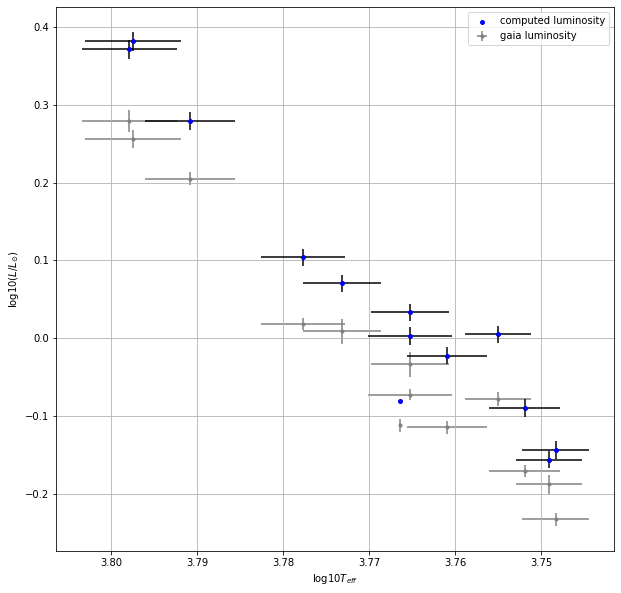

In [20]:
#apply cut that removes RGB stars
step8_df['value'] = 10*np.log10(step8_df['Teff'])-np.log10(step8_df['cal_lum'])-35.5
cut_df = step8_df[step8_df['value']>0].copy()

#plotting cluster to count number of blue stragglers, and other stars to remove
plotCluster(cut_df, plot_gaia=True)

11


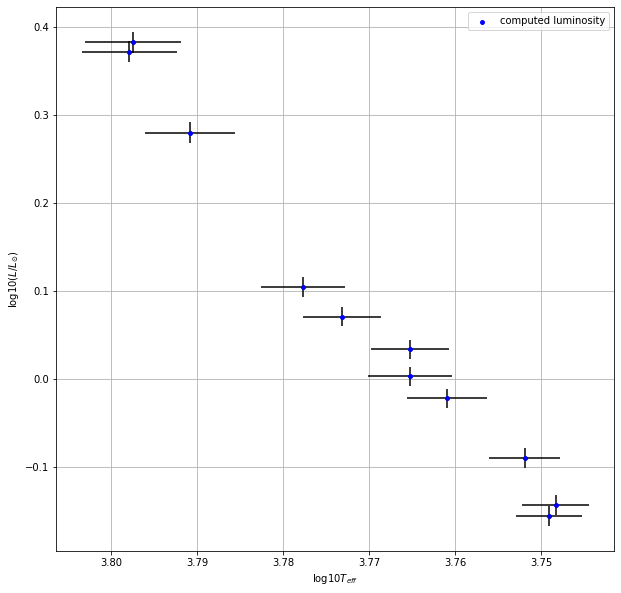

In [21]:
#removing blue stragglers
#no blue stragglers
step9_df = cut_df.copy()

#removing other weird stars
step9_df = removeStars(step9_df, 3.77, -0.1,1)
step9_df = removeStars(step9_df, 3.755, 0,1)

print(len(step9_df.index))
plotCluster(step9_df, plot_gaia=False, plot_train=False, grid_path='grid2_early.csv')

In [22]:
#save data to csv
step9_df.to_csv(f'{OC}/{OC}_final.csv',index=False)

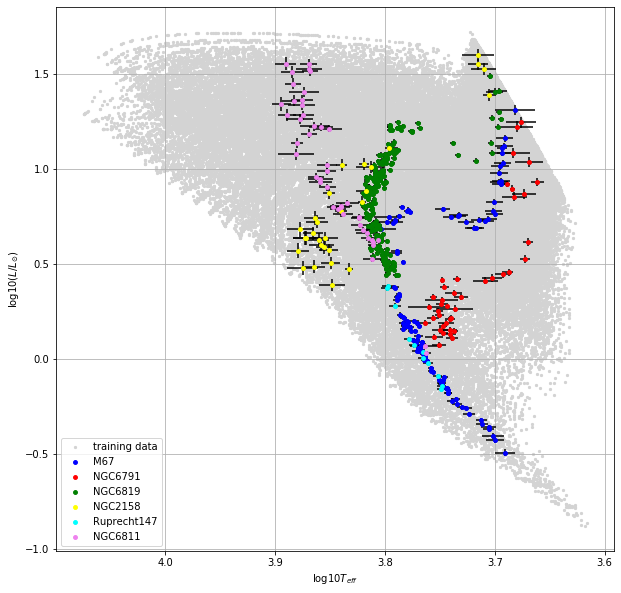

In [63]:
def prepPlot(df, colour, label):
    log_cal_lum_err = df['cal_lum_err']/(df['cal_lum']*np.log(10))
    log_Teff_err = df['Teff_err']/(df['Teff']*np.log(10))
    ax.errorbar(np.log10(df['Teff']), np.log10(df['cal_lum']), xerr=log_Teff_err, yerr=log_cal_lum_err, fmt='.', zorder=2, c='black')
    ax.scatter(np.log10(df['Teff']), np.log10(df['cal_lum']), s=15, zorder=3, c=colour, label=label)

M67_df = pd.read_csv('NGC_2682/NGC_2682_final.csv')
NGC6791_df = pd.read_csv('NGC_6791/NGC_6791_final.csv')
NGC6819_df = pd.read_csv('NGC_6819/NGC_6819_final.csv')
NGC2158_df = pd.read_csv('NGC_2158/NGC_2158_final.csv')
Ruprecht147_df = pd.read_csv('Ruprecht_147/Ruprecht_147_final.csv')
NGC6811_df = pd.read_csv('NGC_6811/NGC_6811_final.csv')

fig, ax=plt.subplots(1,1, figsize=(10,10))
train_df = pd.read_csv('grid2_early.csv')
points = train_df[:100000]
ax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']), s=5, zorder=0, c='lightgrey',label='training data')
prepPlot(M67_df, 'blue', 'M67')
prepPlot(NGC6791_df, 'red', 'NGC6791')
prepPlot(NGC6819_df, 'green', 'NGC6819')
prepPlot(NGC2158_df, 'yellow', 'NGC2158')
prepPlot(Ruprecht147_df, 'cyan', 'Ruprecht147')
prepPlot(NGC6811_df, 'violet', 'NGC6811')

ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\log10(L/L_{\odot})$')
ax.legend()
ax.grid()
plt.show()